In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Positional Encoding for Transformer

Positional Encoding is used in models to inject the order of sequences.
They are frequently used with transformers (since self-attention is permutation-invariant. 
The encoding provides unique position-dependent information for each token in a sequence.

The formula for sinusoidal positional encoding (used in the original Transformer paper) is:

$𝑃𝐸(𝑝𝑜𝑠,2𝑖) = \sin \left ( \frac{pos}{10000^{\frac{2i}{d}}} \right )$

$𝑃𝐸(𝑝𝑜𝑠,2𝑖+1) = \cos \left ( \frac{pos}{10000^{\frac{2i}{d}}} \right )$

where:

- $𝑝𝑜𝑠$ = position of the word in the sequence
- $i$ = dimension index
- $d$ = total embedding dimension


In [28]:
import torch
import math

import matplotlib.pyplot as plt

In [29]:
class PositionalEncoding(torch.nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)  # Shape: (1, max_len, d_model)

    def forward(self, x):
        return x + self.pe[:, :x.shape[1]]

## Dummy data

In [30]:
dummy_input = torch.tensor(
    [[[0.2, 0.4, 0.1, 0.3],
      [0.5, 0.2, 0.7, 0.9],
      [0.8, 0.6, 0.4, 0.2]]]
)
dummy_input

tensor([[[0.2000, 0.4000, 0.1000, 0.3000],
         [0.5000, 0.2000, 0.7000, 0.9000],
         [0.8000, 0.6000, 0.4000, 0.2000]]])

In [31]:
# create the positional encoding

d_model = dummy_input.shape[2]  # Embedding dimension (4)
seq_len = dummy_input.shape[1]  # Length of sequence (3)

pos_encoder = PositionalEncoding(d_model)
pos_encoder.pe

tensor([[[ 0.0000,  1.0000,  0.0000,  1.0000],
         [ 0.8415,  0.5403,  0.0100,  0.9999],
         [ 0.9093, -0.4161,  0.0200,  0.9998],
         ...,
         [ 0.9563, -0.2925, -0.2912,  0.9567],
         [ 0.2705, -0.9627, -0.2816,  0.9595],
         [-0.6639, -0.7478, -0.2720,  0.9623]]])

## Visualize the positional encoding

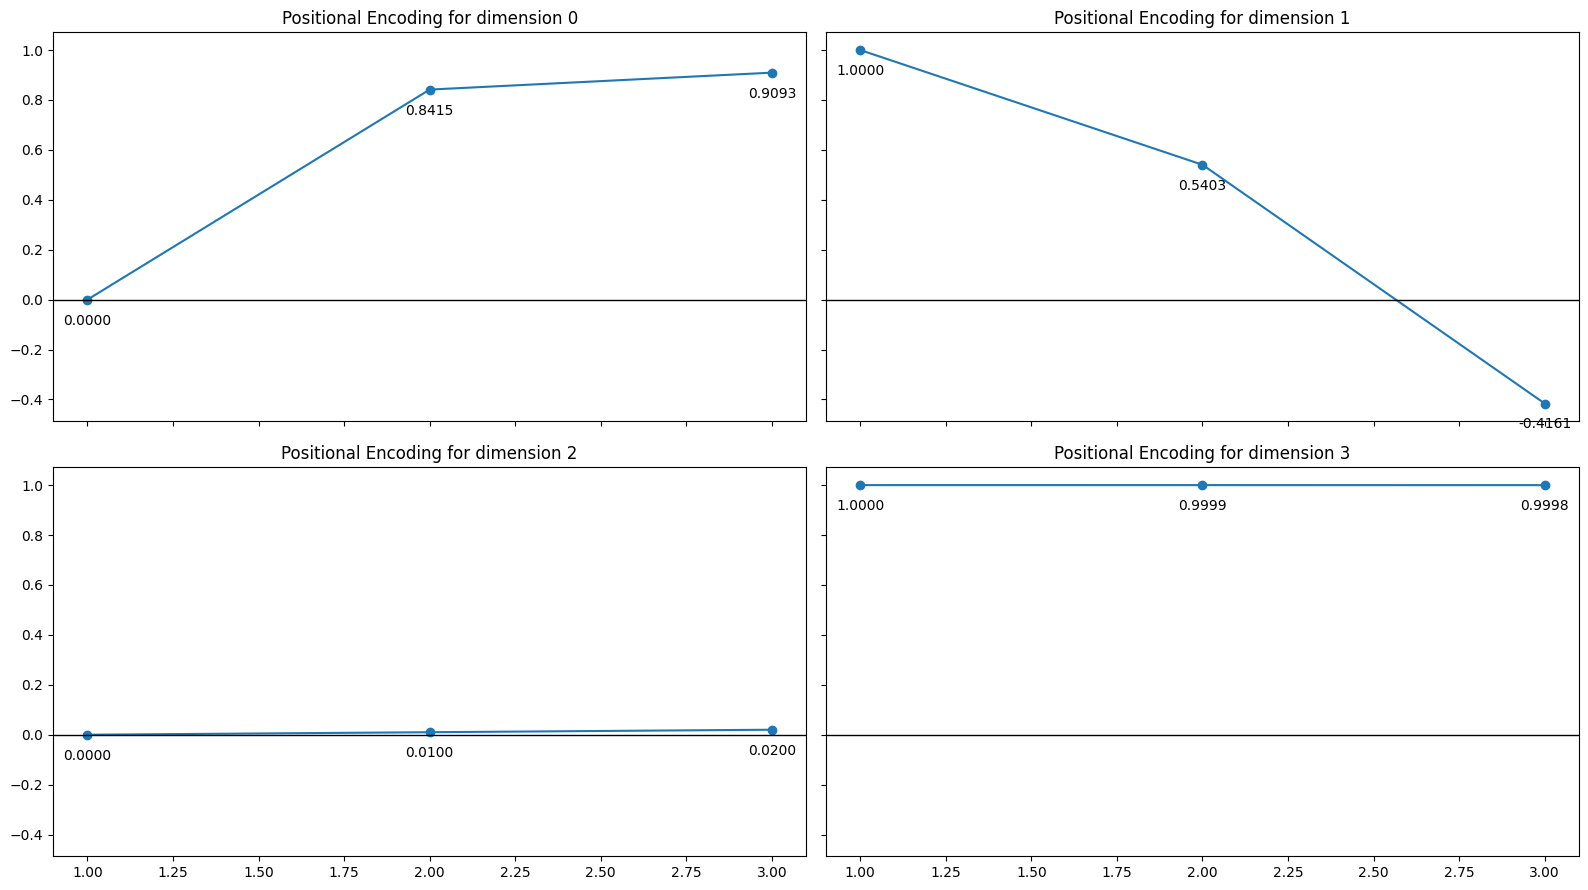

In [33]:
num_lines = d_model // 2
fig, axs = plt.subplots(num_lines, 2, figsize=(16, 9), sharex=True, sharey=True)
for i, ax in enumerate(axs.flatten()):
    values = pos_encoder.pe[0, :seq_len, i]
    ax.plot(range(1, seq_len + 1), values, label=f"PE Column #{i}", marker="o")
    ax.set_title(f"Positional Encoding for dimension {i}")

    for i, v in enumerate(values):
        ax.text(i + 1, v-0.1, "%.4f" %v, ha="center")

    x0, x1 = ax.get_xlim()
    ax.axhline(0, color="black", lw=1)

plt.tight_layout()
plt.show()

## Add positional encoding to the dummy input

In [34]:
output = pos_encoder(dummy_input)
output

tensor([[[0.2000, 1.4000, 0.1000, 1.3000],
         [1.3415, 0.7403, 0.7100, 1.9000],
         [1.7093, 0.1839, 0.4200, 1.1998]]])